In [1]:
import numpy as np
import matplotlib.pyplot as plt
import Thermobar as pt

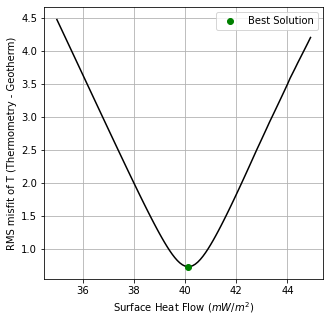

NameError: name 'mantle_geotherm_plot' is not defined

In [3]:
file = "branchetti_2021.xlsx" #Wherever that /Examples/Garnet is
data = pt.import_excel(file, sheet_name = "Sheet_1")
tb_data = data['my_input']

#

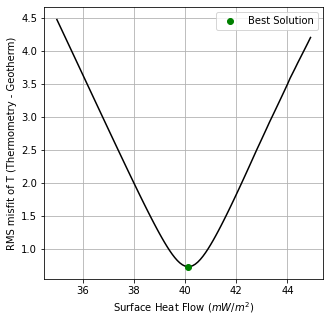

In [7]:
#RSINAN PLEASE REPLACE THIS WITH THERMOBAR FUNCTIONS SHOWING HOW TO CALCULATE THESE AGAIN
T_ext = np.array(tb_data['Temp']) + 273.15
P_ext = np.array(tb_data['P'])

#Inverting for SHF for the function
shf_solution, T_solution, depth_solution, p_solution, misfit_solution = pt.invert_generalised_mantle_geotherm(P_sample = P_ext, T_sample = T_ext, std_P = 0.3, std_T = 50,
 SHF_start = 35, SHF_end=45, SHF_increment=0.1, max_depth=300, kinked=False, BDL_T = 170, adiabat = True,
 plot_solution = True)



In [8]:
#Recalculating with the solution
T, depth, p, depth_intercepts = pt.calculate_hasterok2011_geotherm(
    SHF = shf_solution, BDL_T = 800+273, T_0 = 0, max_depth = 300,
    moho = 38, kinked = False, adiabat = True)



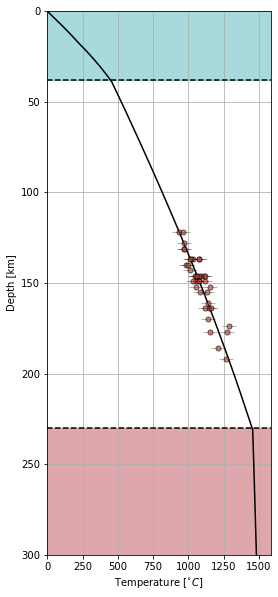

In [9]:
#Making a plot of the solution.
pt.mantle_geotherm_plot(T = T, P = p, Depth = depth, 
                        plot_style = 'Depth', Temp_unit = 'Celsius', 
                        T_Sample = T_ext, P_Sample = P_ext, T_std = 50, 
                        P_std = 0.3, plot_type = 'show', max_depth = 300, 
                        moho = 38, lab = 230)
